# Prise en main de l'API openfoodfacts

## Install et import

In [3]:
try:
    import openfoodfacts
except:
    !pip install openfoodfacts
    import openfoodfacts

## Tests de l'API

Usage guide :
https://github.com/openfoodfacts/openfoodfacts-python/blob/master/docs/Usage.md

Les facets sont retournés sous forme de listes de dictionnaires.

Les variables sont définies à :
https://world.openfoodfacts.org/data/data-fields.txt

### Requête d'une facette : retourne les modalités d'une variable

In [86]:
additives = openfoodfacts.facets.get_additives()
print(len(additives))
# additives

561


In [1]:
# brands = openfoodfacts.facets.get_brands()
# brands

In [87]:
# openfoodfacts.facets.get_categories()

In [88]:
countries = openfoodfacts.facets.get_countries()
print(len(countries))
#countries

640


In [89]:
# openfoodfacts.facets.get_ingredients()   # erreur dans le code source

In [90]:
languages = openfoodfacts.facets.get_languages()
print(len(languages))
# languages

135


In [91]:
places = openfoodfacts.facets.get_purchase_places()
print(len(places))
# places

4781


In [92]:
stores = openfoodfacts.facets.get_stores()
print(len(stores))
# stores

6436


In [93]:
traces = openfoodfacts.facets.get_traces()
print(len(traces))
# traces

7636


### Requête de produits répondant à une seule modalité de facette

In [77]:
products = openfoodfacts.products.get_by_trace('egg')
print(len(products))
#products

24


In [78]:
products = openfoodfacts.products.get_by_country('France')
print(len(product))
#products

191


In [63]:
ingredient = 'phosphate de calcium'
products_ingredient = openfoodfacts.products.get_by_ingredient(ingredient)
for product in products_ingredient:
    print (product['product_name'])

Mini Fruits
A  Toddler Tout-petits
Almond Dream Almond Milk



### Requête de produits répondant à plusieurs modalités

get_by_facets() : résultat très décevant. La requête ne retourne que 24 produits.

In [79]:
# liste des produits contenant des traces d'oeuf, et country=France
products = openfoodfacts.products.get_by_facets(
#     {'trace': 'egg', 'country': 'france'})
    {'trace': 'egg'})
print(len(products))
#products   # products est une liste de dictionnaires

24


In [58]:
products[1]

{'_id': '4037300108514',
 '_keywords': ['dosensuppen',
  'fertiggerichte',
  'suppen',
  'dosen',
  'in',
  'erasco',
  'konserven',
  'ungarische',
  'gulaschsuppe'],
 'added_countries_tags': [],
 'additives_debug_tags': [],
 'additives_n': 4,
 'additives_old_n': 1,
 'additives_old_tags': ['en:e472e'],
 'additives_original_tags': ['en:e14xx', 'en:e472e', 'en:e412', 'en:e415'],
 'additives_prev_original_tags': [],
 'additives_tags': ['en:e14xx', 'en:e412', 'en:e415', 'en:e472e'],
 'allergens': 'en:gluten,en:milk',
 'allergens_from_ingredients': 'Weizenmehl, Milchzucker, Gerstenmalzextrakt, Milcheiweiß',
 'allergens_from_user': '(de) en:gluten,en:milk',
 'allergens_hierarchy': ['en:gluten', 'en:milk'],
 'allergens_lc': 'de',
 'allergens_tags': ['en:gluten', 'en:milk'],
 'amino_acids_prev_tags': [],
 'amino_acids_tags': [],
 'brands': 'Erasco',
 'brands_tags': ['erasco'],
 'carbon_footprint_percent_of_known_ingredients': '13.4',
 'categories': 'Konserven, Fertiggerichte, Suppen, Fertigge

In [60]:
for product in products:
    print(product['product_name'])
#     print(product['added_countries_tags'])

Adoro Lait
Ungarische Gulaschsuppe
Cioccolato fondente 74%
Darált édespaprika
Biscuit Soja Orange
Cashewkerne
Emincés de poulet
Fromage fondu Les Petits Triangles - 24 portions
Spaghetti Blé & Quinoa - Ail et persil
Sablés nappés chocolat au lait
tarama œufs cabillaud fumé
Cappucino saveur vanille
BISCUITS blé, épeautre et sésame
Eiweißbrötchen
Préparation Falafels Pois Chiches
Hot dog
Mie Nudeln
Black cookies
Pain de mie complet maxi jambon beurre
Palmiers dorés sans sucres ajoutés
Boulghour de riz, légumes et colombo
Mon 1er biscuit au chocolat
Crevettes cuites et décortiquées
Crevettes Décortiquées


In [17]:
products[0].keys()

dict_keys(['_id', '_keywords', 'added_countries_tags', 'additives_debug_tags', 'additives_n', 'additives_old_n', 'additives_old_tags', 'additives_original_tags', 'additives_prev_original_tags', 'additives_tags', 'allergens', 'allergens_from_ingredients', 'allergens_from_user', 'allergens_hierarchy', 'allergens_lc', 'allergens_tags', 'amino_acids_prev_tags', 'amino_acids_tags', 'brands', 'brands_tags', 'categories', 'categories_hierarchy', 'categories_lc', 'categories_old', 'categories_properties', 'categories_properties_tags', 'categories_tags', 'category_properties', 'checkers_tags', 'ciqual_food_name_tags', 'cities_tags', 'code', 'codes_tags', 'compared_to_category', 'complete', 'completeness', 'correctors_tags', 'countries', 'countries_hierarchy', 'countries_lc', 'countries_tags', 'created_t', 'creator', 'data_quality_bugs_tags', 'data_quality_errors_tags', 'data_quality_info_tags', 'data_quality_tags', 'data_quality_warnings_tags', 'data_sources', 'data_sources_tags', 'debug_param_

In [26]:
type(products)

list

### Requête d'un produit en particulier via le barcode

In [54]:
barcode = '3036810201280'
product = openfoodfacts.products.get_product(barcode)
print(product['product']['product_name'])
print("keys du dictionnaire :", list(product.keys()))
product

Dijon Originale
keys du dictionnaire : ['code', 'product', 'status', 'status_verbose']


{'code': '3036810201280',
 'product': {'_id': '3036810201280',
  '_keywords': ['dijon-senf',
   'grocerie',
   'condiment',
   'sauce',
   'maille',
   'dijon',
   'originale',
   'mustard',
   'unspecified'],
  'additives_debug_tags': [],
  'additives_n': 2,
  'additives_old_n': 0,
  'additives_old_tags': [],
  'additives_original_tags': ['en:e330', 'en:e224'],
  'additives_prev_original_tags': ['en:e330', 'en:e224'],
  'additives_tags': ['en:e224', 'en:e330'],
  'allergens': 'en:mustard,de:Kaliummetabisulfit',
  'allergens_from_ingredients': 'Senfkörner, Kaliummetabisulfit',
  'allergens_from_user': '(en) en:mustard,de:Kaliummetabisulfit',
  'allergens_hierarchy': ['en:mustard', 'de:Kaliummetabisulfit'],
  'allergens_lc': 'en',
  'allergens_tags': ['en:mustard', 'de:kaliummetabisulfit'],
  'amino_acids_prev_tags': [],
  'amino_acids_tags': [],
  'brands': 'Maille',
  'brands_tags': ['maille'],
  'categories': 'Lebensmittel, Gewürzmittel, Saucen, Senfe, Dijon-Senfe',
  'categories_hie

### Search

#### Basic search

La méthode search_all() est préférable à search(). La seconde méthode retourne des méta-données en plus de l'itérable.

##### Méthode search()

In [80]:
query = 'mustard maille'
search_result = openfoodfacts.products.search(query)
# search_result

##### Méthode search_all()

In [83]:
query = 'mustard maille'
search_result = openfoodfacts.products.search_all(query)
for product in search_result:
#     print (product['product_name'])
#     display(product)
    pass

#### Advanced Search : non pertinent

### Download data

In [44]:
file_type = 'csv'
openfoodfacts.utils.download_data(file_type)

L'instruction download_data() télécharge le data set dans le dossier ~/user.
Ca a pris 5min17s le 5 mai.

## Conclusion des tests

Les résultats sont décevants. Les requêtes retournent des données incomplètes.
Quant à la fonction de download de data, elle fonctionne et récupère le dataset.

# Prise en main du jeu de données openfoodfact

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

Modification des paramètres d'affichage de Jupyter :

In [2]:
# pour gérer l'affichage des dataframes pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

# pour gérer l'affichage des arrays numpy
# 230 sur ma config bureau, 165 sur ma config portable
np.set_printoptions(linewidth=165)

# pour afficher les gros fichiers sur toute la largeur de l'écran
from IPython.core.display import HTML
HTML("<style>.container { width:97% }</style>")

## Ouverture du fichier .csv  =>  df1

Pour le fichier csv, on prend connaissance de :  
- son contenu (fonction "display" de IPython).
- ses infos et sa description (méthodes "info" et "describe" de pandas).
- de la qualité des données (fonctions du module missingno).

In [3]:
df1 = pd.read_csv('products.csv', sep='\t', low_memory=False)     # 54s avec low_memory=True ; 75s avec low_memory=False, mais gère le dtype automatiquement

Extraction complète de quelques lignes du df

In [4]:
with pd.option_context('display.max_rows', 400, 'display.max_colwidth', 1000):
    display(df1.loc[[4]])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
4,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,100g,NaN,NaN,NaN,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",NaN,NaN,NaN,NaN,NaN,Delois france,fr:delois-france,fr:delois-france,NaN,NaN,NaN,NaN,NaN,NaN,courte paille,France,en:france,France,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutarde sel (cette _moutarde_ uniquement disponible chez courte paille),en:mustard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,18.0,d,NaN

In [5]:
length = len(df1)
print("length =", length)

length = 1772411


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772411 entries, 0 to 1772410
Columns: 186 entries, code to carnitine_100g
dtypes: float64(123), int64(2), object(61)
memory usage: 2.5+ GB


In [7]:
df1_describe = df1.describe(include='all')

In [8]:
df1_describe

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1772411,1772411,1772407,1.772411e+06,1772411,1.772411e+06,1772411,1694885,3660,113926,457438,284337,284310,3996,923718,923661,848790,848788,848788,76807,76688,76688,113391,113340,389663,389683,389683,113369,113338,69755,0.0,75183,151539,234881,1766912,1766907,1766907,689245,182078,0.0,94438,117367,117367,470053,4.652110e+05,0.0,689247.000000,4,399224,399224,689247.000000,0.0,14019,689247.000000,0.0,40287,660320.000000,660320,602710.000000,1755634,1771898,1772411,1772411,1772411,289622,426653.000000,426653,848788,848788,1326405,1326405,676652,676652,867587,867587,1.282710e+05,1.354084e+06,1.407610e+06,976.000000,1.399529e+06,1.356270e+06,16.000000,3.000000,3.000000,10.000000,16.000000,8.000000,2.000000e+01,7.000000,81.000000,30.000000,3.000000e+00,8.000000,16.000000,11.000000,47425.000000,47425.000000,1985.00000,481.000000,118.000000,171.000000,515.000000,2

In [9]:
# msno.bar(df1)     # trop de colonnes => bug de msno
# msno.matrix(df1)    # 30Go de RAM

## Nom des colonnes et disponibilité des données par colonne

In [10]:
# définitions récupérées
definitions = {
"code" : "barcode of the product",     # (can be EAN-13 or internal codes for some food stores), for products without a barcode, Open Food Facts assigns a number starting with the 200 reserved prefix
"url" : "url of the product page on Open Food Facts",
"creator" : "contributor who first added the product",
"created_t" : "date that the product was added (UNIX timestamp format)",
"created_datetime" : "date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)",
"last_modified_t" : "date that the product page was last modified",
"product_name" : "name of the product",
"quantity" : "quantity and unit",
"packaging" : "shape, material",
"origins" : "origins of ingredients",
"manufacturing_places" : "places where manufactured or transformed",
"first_packaging_code_geo" : "coordinates corresponding to the first packaging code indicated",
"countries" : "list of countries where the product is sold",
"serving_size" : "serving size in g",
"no_nutriments" : "indicates if the nutrition facts are indicated on the food label",
"additives_n" : "number of food additives",
"nutrition_grade_fr" : "nutrition grade ('a' to 'e'). see https://fr.openfoodfacts.org/nutriscore",
"fruits-vegetables-nuts_100g" : "% of fruits, vegetables and nuts (excluding potatoes, yams, manioc)",
"carbon-footprint_100g" : "carbon footprint (as indicated on the packaging of some products)",
"nutrition-score-fr_100g" : "Nutri-Score FR",     # Nutrition score derived from the UK FSA score and adapted for the French market (formula defined by the team of Professor Hercberg)
"nutrition-score-uk_100g" : "nutrition score defined by the UK Food Standards Administration (FSA)",
"pnns_groups_1" : "parmi les 7 groupes d'aliments du PNNS",     # https://www.mangerbouger.fr/pro/IMG/pdf/livret_civ.pdf
"nova_group" : "Une classification en 4 groupes (1,2,3,4) pour mettre en évidence le degré de transformation des aliments"     # https://fr.openfoodfacts.org/nova
}

In [11]:
print("NOM DES COLONNES".rjust(45,' '), "NOMBRE DE DONNEES".rjust(18,' '), "% DISPONIBLE".rjust(15,' '), "DTYPE".rjust(10,' '), "   DESCRIPTION")
for colonne in df1_describe :
    if colonne in definitions :
        description = definitions[colonne]
    else :
        description = ""
    print(colonne.rjust(45,' '), str(int(df1_describe[colonne]['count'])).rjust(18,' '), "{0:0.3f}".format(df1_describe[colonne]['count']/len(df1)*100).rjust(15,' '), str(df1[colonne].dtype).rjust(10,' '), "   " + description)

                             NOM DES COLONNES  NOMBRE DE DONNEES    % DISPONIBLE      DTYPE    DESCRIPTION
                                         code            1772411         100.000     object    barcode of the product
                                          url            1772411         100.000     object    url of the product page on Open Food Facts
                                      creator            1772407         100.000     object    contributor who first added the product
                                    created_t            1772411         100.000      int64    date that the product was added (UNIX timestamp format)
                             created_datetime            1772411         100.000     object    date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)
                              last_modified_t            1772411         100.000      int64    date that the product page was last modified
                       last_modified_datetime

## Analyse univariée des variables du dataframe df1

### Histogramme du nutriscore_score

In [12]:
ser = df1['nutriscore_score']

In [13]:
np.sort(ser.unique())

array([-15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  38.,  39.,  40.,  nan])

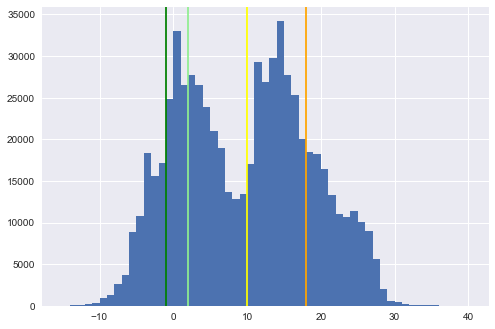

In [14]:
# plotting histogram
bins=range(-15,41)
plt.style.use('seaborn')
plt.hist(ser, bins=bins)
# axvline
plt.axvline(x=-1, color='green')         # grade A solide
plt.axvline(x=2, color='lightgreen')     # grade B solide
plt.axvline(x=10, color='yellow')        # grade C solidec
plt.axvline(x=18, color='orange')        # grade D solide
plt.show()

### Fonction histogramme()

Retourne un histogramme pour une variable (colonne) du df1

Arguments :

    - colonne : string du nom de colonne
    - min_x : valeur min représentée en abcisse
    - max_x : valeur max représentée en abcisse
    - density : si True, trace les fréquences (normées à 1) ; si False, trace les effectifs.
    - type_variable : 'discrète' pour un tracé de type barchart ; 'continue' pour un tracé de type histogramme
    - n_bins : nb d'intervalles dans l'histogramme

In [15]:
def histogramme(colonne='additives_n', min_x=None, max_x=None, density=True, type_variable='discrète', n_bins=None) :
    
    # extraction du dataframe
    ser = df1[colonne]
    total_count = df1_describe[colonne]['count']

    # ser_min, ser_max
    if max_x is None :
        ser_max = ser.max()
    else :
        ser_max = max_x
    if min_x is None :
        ser_min = ser.min()
    else :
        ser_min = min_x
        
    # type_variable
    if type_variable == 'discrète' :     # on trace un bar chart centré sur la valeur centrale plutôt qu'un "vrai" histogramme
        align = 'left'
        rwidth = 0.8
        bins=range(int(ser_min), int(ser_max+1))     # il y a autant de bins que de modalités de la variable discrète
    elif type_variable == 'continue':  
        align = 'mid'
        rwidth = 1.0
        if n_bins is None:
            nb_bins = int(np.log2(total_count)+1)     # Règle de Sturges
        else:
            nb_bins = n_bins
        bins=[( ser_min + x*(ser_max-ser_min)/nb_bins ) for x in range(0, nb_bins)]     # nb_bins espacés linéairement
    
    # titre
    if density == True :
        if type_variable == 'discrète' :
            plt.title(label='Fréquence de la variable " '+colonne+' "  (Effectif total = '+str(int(total_count))+')')
        elif type_variable == 'continue':  
            plt.title(label='Densité de probabilité de la variable " '+colonne+' "  (Effectif total = '+str(int(total_count))+')')
    else :
        plt.title(label='Distribution de la variable " '+colonne+' "  (Effectif total = '+str(int(total_count))+')')
        
    # plotting
    plt.style.use('seaborn')
    plt.hist(ser, bins=bins, density=density, label=colonne, align=align, rwidth=rwidth)
    plt.legend()
    plt.show()
    

### Fonction boite_moustaches()

Retourne un boxplot pour une variable (colonne) du df1.  
Marque la moyenne avec un point rouge.
Affiche les valeurs : moyenne, médiane, écart-type (empirique).

Arguments :  
- colonne : string du nom de colonne  
- min_x : valeur min représentée en abcisse  
- max_x : valeur max représentée en abcisse  

In [139]:
def boite_moustaches(colonne='energy-kj_100g', min_x=None, max_x=None) :
    plt.style.use('seaborn')

    # extraction du dataframe
    ser = df1[colonne]
    ser.dropna(inplace=True)
    
    # filtration des valeurs aberrantes. On exclue les valeurs à l'extérieur de l'intervalle [min_x, max_x] considérées comme aberrantes.
    largeur = max_x - min_x
    def f_bool(x):
        if x < min_x :
            return False
        elif x > max_x:
            return False
        else:
            return True
    ser_bool = ser.apply(lambda x : f_bool(x))
    total_count = ser_bool.sum()  # nb de valeurs comprises dans l'intervalle [min_x, max_x]
    ser=ser[ser_bool]
    
    # moyenne, médiane, écart-type
    moyenne = ser.mean()   
    mediane = ser.median()
    ecart_type = ser.std()
    
    # plotting boxplot
    plt.boxplot(ser, vert=0)
    plt.xlim(min_x-0.01*largeur,max_x+0.01*largeur) 
    plt.ylim(1.25, 0.75) 
    plt.title(label='Distribution de la variable " '+colonne+' "  (Effectif total = '+str(int(total_count))+')')
    plt.yticks(ticks=[1], labels=[''])
    # plotting dot "moyenne"
    plt.plot(moyenne, 1, marker='o', markersize=10, color='red')    # le boxplot est tracé à l'ordonnée y=1  # L'axe des y est inversé
    # annotations
    plt.annotate(text="Médiane = {0:0.2f}".format(mediane), xy=(min_x+largeur/20,0.8), color='green')
    plt.annotate(text="Moyenne = {0:0.2f}".format(moyenne), xy=(min_x+largeur/20,0.85), color='red')
    plt.annotate(text="Ecart-type = {0:0.2f}".format(ecart_type), xy=(min_x+largeur/20,0.9), color='blue')
    plt.show()

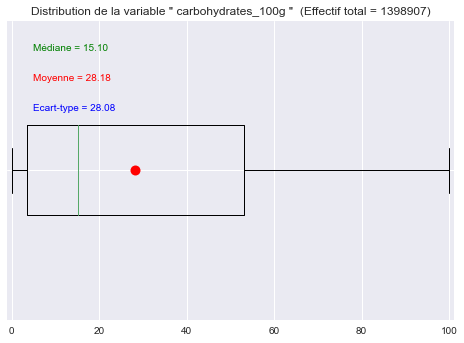

In [140]:
boite_moustaches(colonne='carbohydrates_100g', min_x=0, max_x=100)

### Tracé d'histogrammes et de boxplots

#### Variables quantitatives discrètes

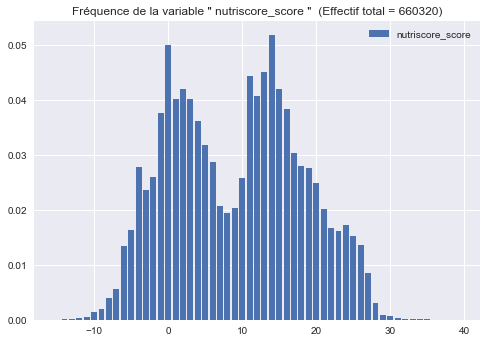

In [18]:
histogramme('nutriscore_score', type_variable='discrète')

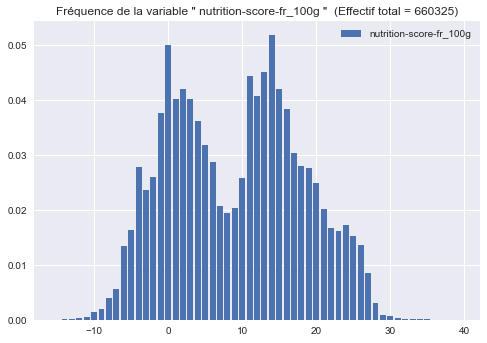

In [19]:
histogramme('nutrition-score-fr_100g', type_variable='discrète')

9.175102980373152

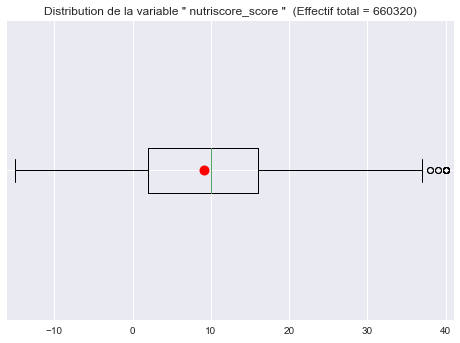

In [17]:
boite_moustaches(colonne='nutriscore_score', min_x=-16, max_x=41)

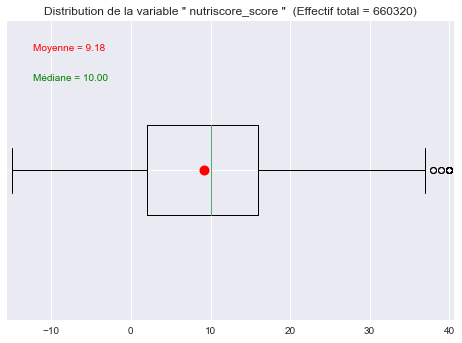

In [123]:
boite_moustaches(colonne='nutriscore_score', min_x=-15, max_x=40)

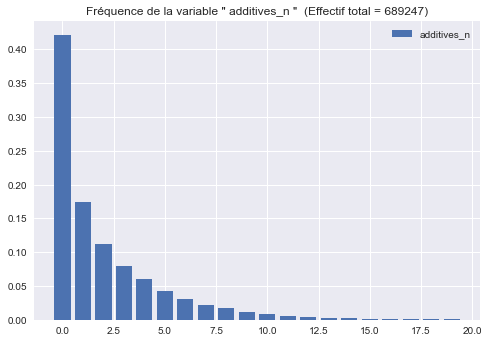

In [21]:
histogramme('additives_n', max_x=20, type_variable='discrète')

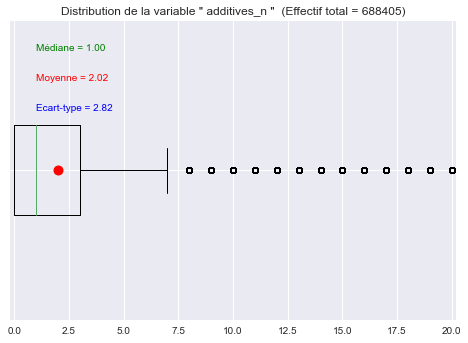

In [141]:
boite_moustaches(colonne='additives_n', min_x=0, max_x=20)

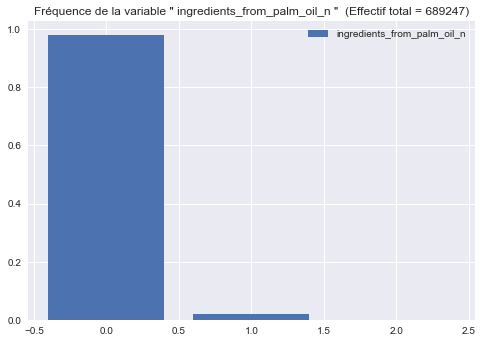

In [23]:
histogramme('ingredients_from_palm_oil_n', type_variable='discrète')

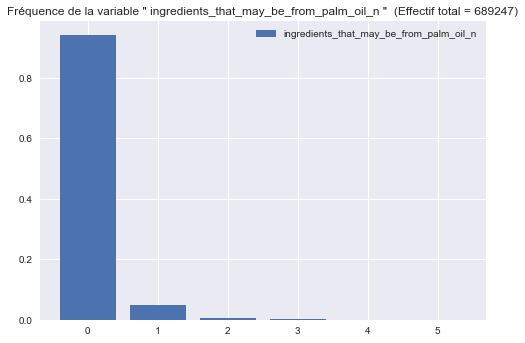

In [24]:
histogramme('ingredients_that_may_be_from_palm_oil_n', type_variable='discrète')

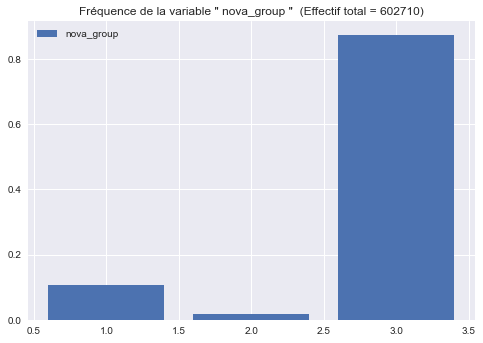

In [25]:
histogramme('nova_group', type_variable='discrète')

#### Variables quantitatives continues

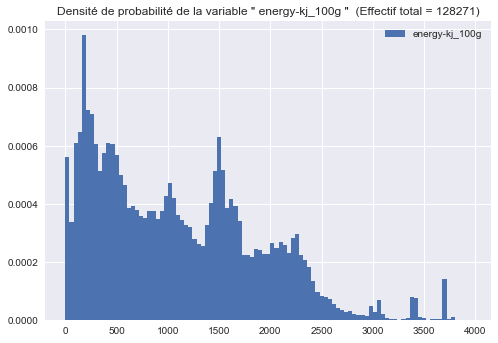

In [26]:
histogramme('energy-kj_100g', type_variable='continue', density=True, min_x=0, max_x=4000, n_bins=100)

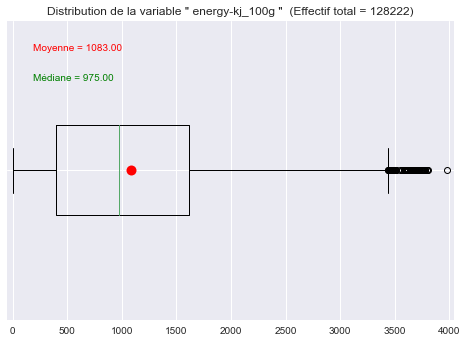

In [124]:
boite_moustaches(colonne='energy-kj_100g', min_x=-10, max_x=4000)

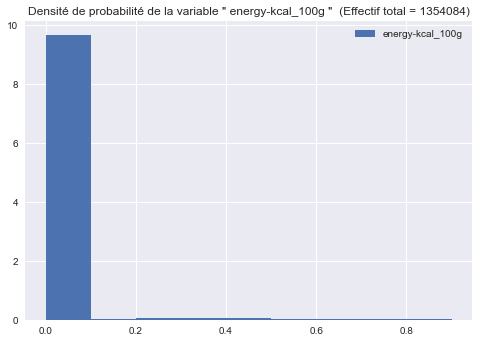

In [125]:
histogramme('energy-kcal_100g', type_variable='continue', density=True, min_x=0, max_x=1, n_bins=10)     # cette variable est buggée (les valeurs sont preque toutes < 0.1)

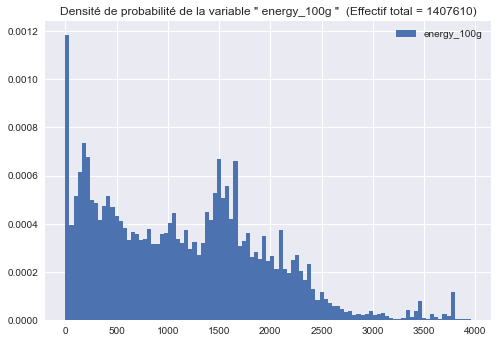

In [29]:
histogramme('energy_100g', type_variable='continue', density=True, min_x=0, max_x=4000, n_bins=100)     # variable pas claire : kj ou kcal ?!?

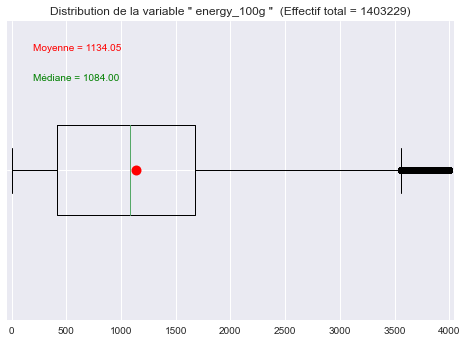

In [129]:
boite_moustaches(colonne='energy_100g', min_x=0, max_x=4000)

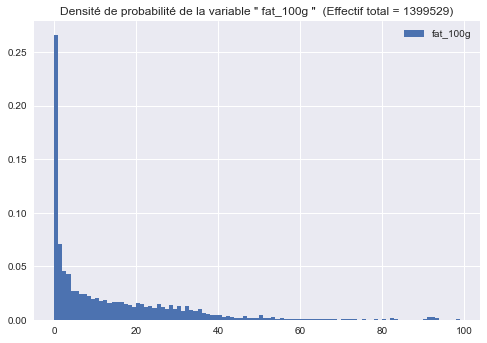

In [31]:
histogramme('fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

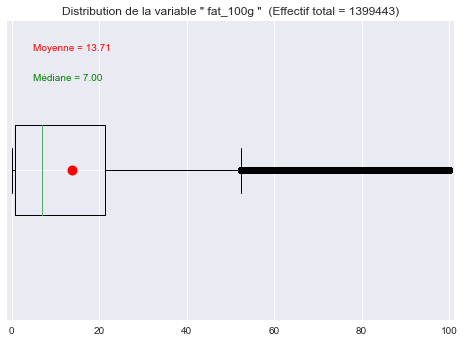

In [128]:
boite_moustaches(colonne='fat_100g', min_x=0, max_x=100)

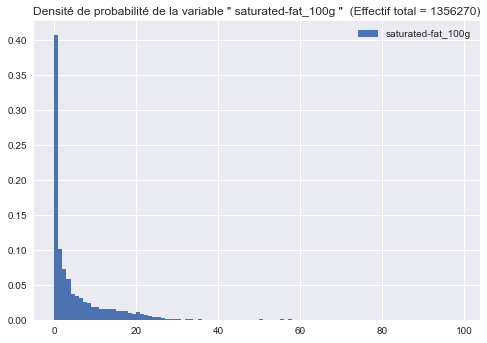

In [33]:
histogramme('saturated-fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

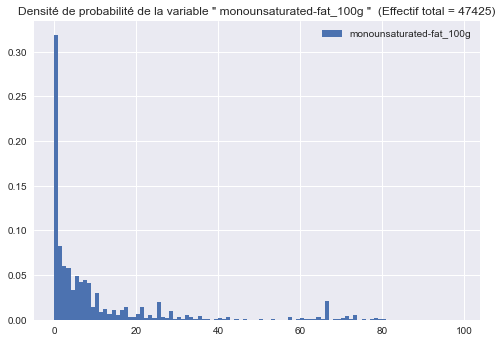

In [34]:
histogramme('monounsaturated-fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

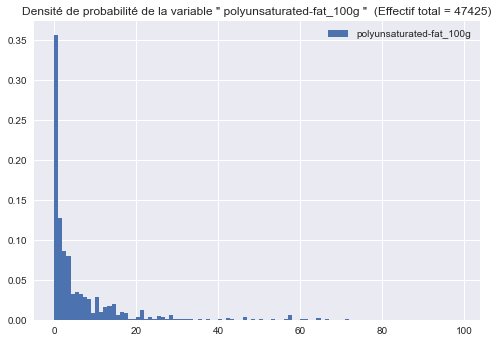

In [35]:
histogramme('polyunsaturated-fat_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

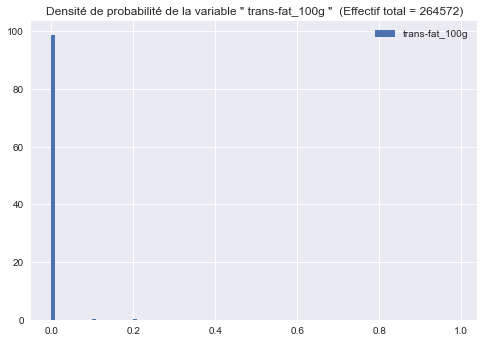

In [36]:
histogramme('trans-fat_100g', type_variable='continue', density=True, min_x=0, max_x=1, n_bins=100)

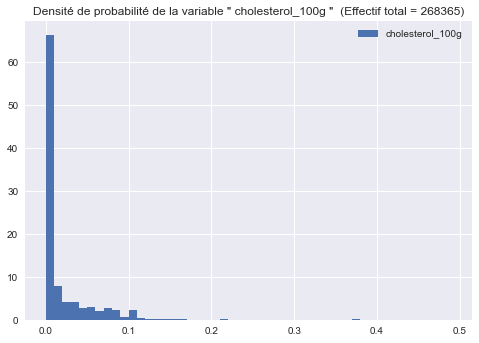

In [37]:
histogramme('cholesterol_100g', type_variable='continue', density=True, min_x=0, max_x=0.5, n_bins=50)

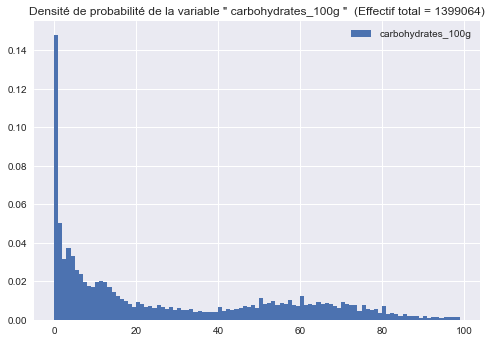

In [38]:
histogramme('carbohydrates_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

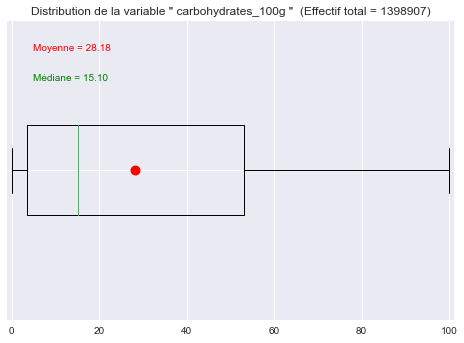

In [130]:
boite_moustaches(colonne='carbohydrates_100g', min_x=0, max_x=100)

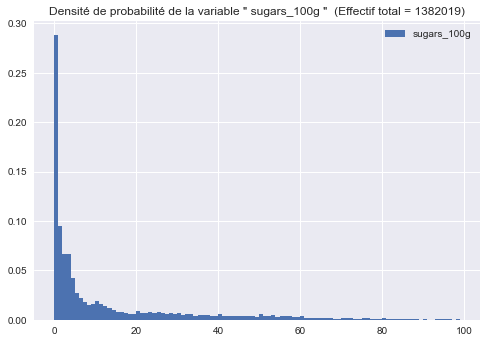

In [40]:
histogramme('sugars_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

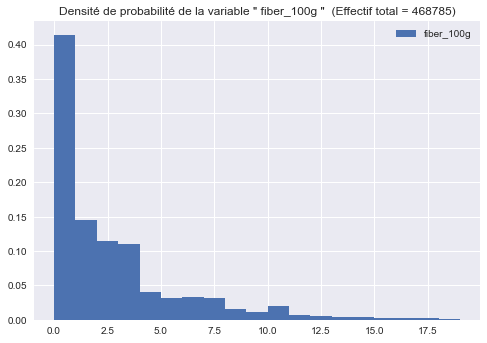

In [41]:
histogramme('fiber_100g', type_variable='continue', density=True, min_x=0, max_x=20, n_bins=20)  # présence de valeurs aberrantes > 100g et < 0g

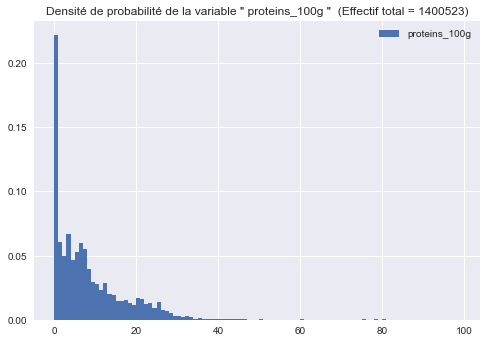

In [42]:
histogramme('proteins_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

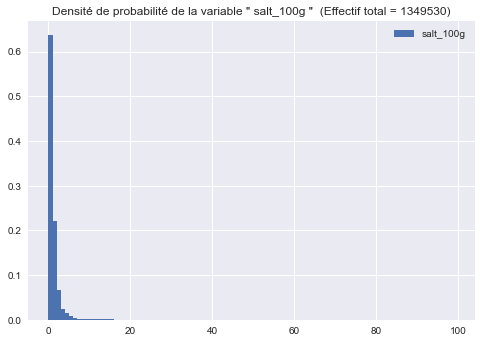

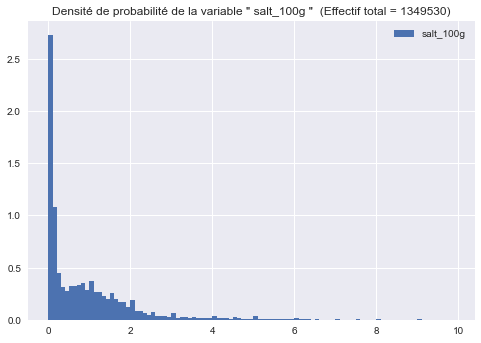

In [43]:
histogramme('salt_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)
histogramme('salt_100g', type_variable='continue', density=True, min_x=0, max_x=10, n_bins=100)

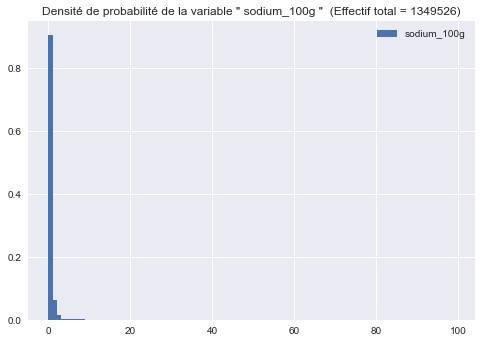

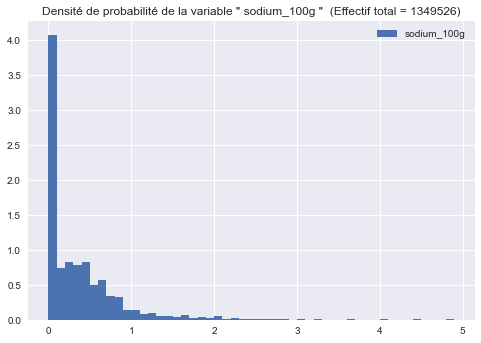

In [44]:
histogramme('sodium_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)
histogramme('sodium_100g', type_variable='continue', density=True, min_x=0, max_x=5, n_bins=50)

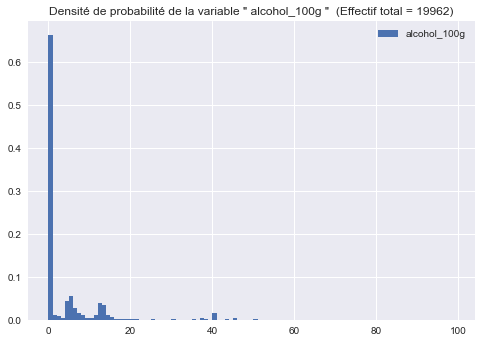

Pour les produits à plus de 1% d'alcool :


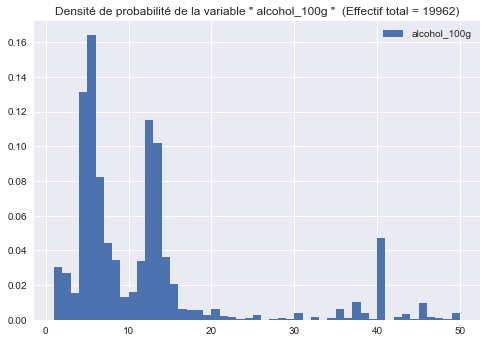

In [143]:
histogramme('alcohol_100g', type_variable='continue', density=True, min_x=0, max_x=100, n_bins=100)

print("Pour les produits à plus de 1% d'alcool :")
histogramme('alcohol_100g', type_variable='continue', density=True, min_x=1, max_x=51, n_bins=50)

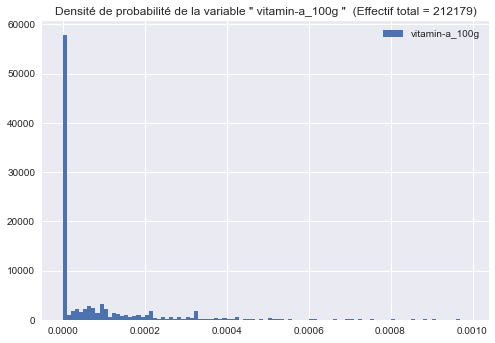

In [46]:
histogramme('vitamin-a_100g', type_variable='continue', density=True, min_x=0, max_x=0.001, n_bins=100)

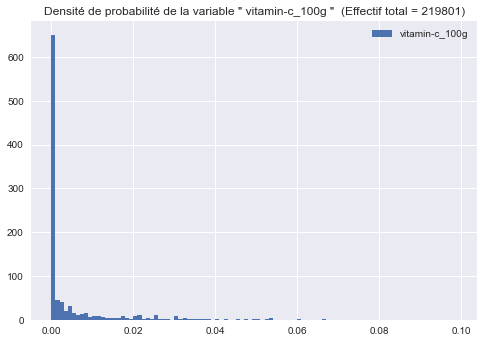

In [47]:
histogramme('vitamin-c_100g', type_variable='continue', density=True, min_x=0, max_x=0.1, n_bins=100)

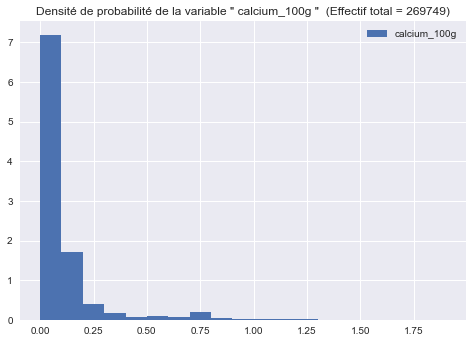

In [48]:
histogramme('calcium_100g', type_variable='continue', density=True, min_x=0, max_x=2, n_bins=20)

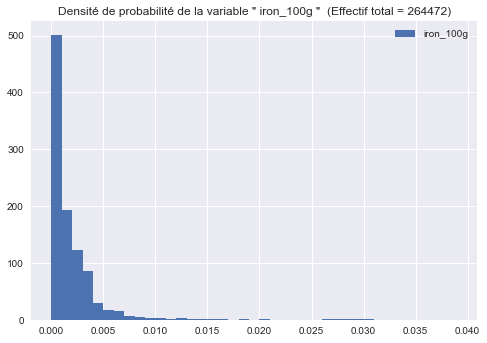

In [49]:
histogramme('iron_100g', type_variable='continue', density=True, min_x=0, max_x=0.04, n_bins=40)

#### Variables qualitatives

##### nutriscore_grade

In [50]:
ser = df1['nutriscore_grade'].value_counts().sort_index()
ser

a    106066
b     83995
c    140397
d    205577
e    124285
Name: nutriscore_grade, dtype: int64

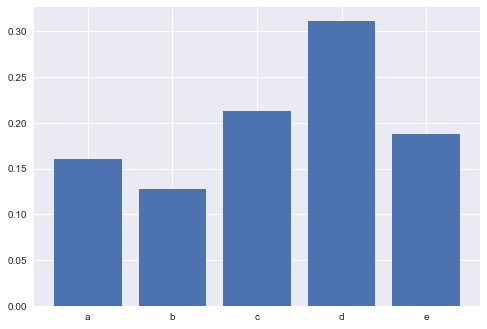

In [51]:
# barplot normalisé
ser = df1['nutriscore_grade'].value_counts(normalize=True).sort_index()
plt.style.use('seaborn')
plt.bar(ser.index, ser.values)
plt.show()

##### pnns_groups_1

In [52]:
ser = df1['pnns_groups_1'].value_counts().sort_index()
ser

Beverages                    64585
Cereals and potatoes         79159
Composite foods              52294
Fat and sauces               67281
Fish Meat Eggs               90503
Fruits and vegetables        46057
Milk and dairy products      87520
Salty snacks                 31928
Sugary snacks               140948
cereals-and-potatoes            56
fruits-and-vegetables         7330
salty-snacks                     6
sugary-snacks                 5365
unknown                    1082602
Name: pnns_groups_1, dtype: int64

In [53]:
# suppression des 'unknown' pour faciliter la normalisation 
ser = df1['pnns_groups_1'].copy()
ser = ser[ser!='unknown']
ser = ser.value_counts(normalize=True).sort_index(ascending=False)
ser

sugary-snacks              0.007971
salty-snacks               0.000009
fruits-and-vegetables      0.010891
cereals-and-potatoes       0.000083
Sugary snacks              0.209422
Salty snacks               0.047439
Milk and dairy products    0.130038
Fruits and vegetables      0.068432
Fish Meat Eggs             0.134471
Fat and sauces             0.099967
Composite foods            0.077699
Cereals and potatoes       0.117616
Beverages                  0.095961
Name: pnns_groups_1, dtype: float64

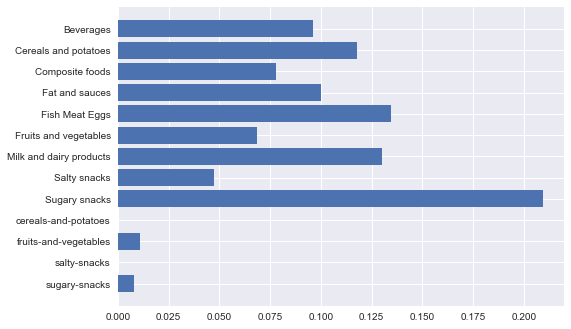

In [54]:
# barplot normalisé
plt.style.use('seaborn')
plt.barh(ser.index, ser.values)
plt.xticks(rotation=0)
plt.show()

##### pnns_groups_2

In [55]:
ser = df1['pnns_groups_2'].value_counts().sort_index()
ser

Alcoholic beverages                   15646
Appetizers                            10729
Artificially sweetened beverages       9128
Biscuits and cakes                    60590
Bread                                 21077
Breakfast cereals                      8922
Cereals                               37796
Cheese                                43499
Chocolate products                    13889
Dairy desserts                         6541
Dressings and sauces                  47118
Dried fruits                           5657
Eggs                                   3291
Fats                                  20163
Fish and seafood                      24677
Fruit juices                           8880
Fruit nectars                          1188
Fruits                                15887
Ice cream                              6511
Legumes                                8571
Meat                                  26825
Milk and yogurt                       30969
Nuts                            

In [56]:
# suppression des 'unknown' pour faciliter la normalisation 
ser = df1['pnns_groups_2'].copy()
ser = ser[ser!='unknown']
ser = ser.value_counts(normalize=True).sort_index(ascending=False)
ser

vegetables                          0.010184
pastries                            0.007783
nuts                                0.000009
legumes                             0.000028
fruits                              0.000450
cereals                             0.000054
Waters and flavored waters          0.008999
Vegetables                          0.031686
Unsweetened beverages               0.014278
Teas and herbal teas and coffees    0.002249
Sweets                              0.096430
Sweetened beverages                 0.032433
Soups                               0.003876
Sandwiches                          0.005671
Salty and fatty products            0.019707
Processed meat                      0.050024
Potatoes                            0.004052
Plant-based milk substitutes        0.007889
Pizza pies and quiches              0.000897
Pizza pies and quiche               0.010399
One-dish meals                      0.059796
Offals                              0.001783
Nuts      

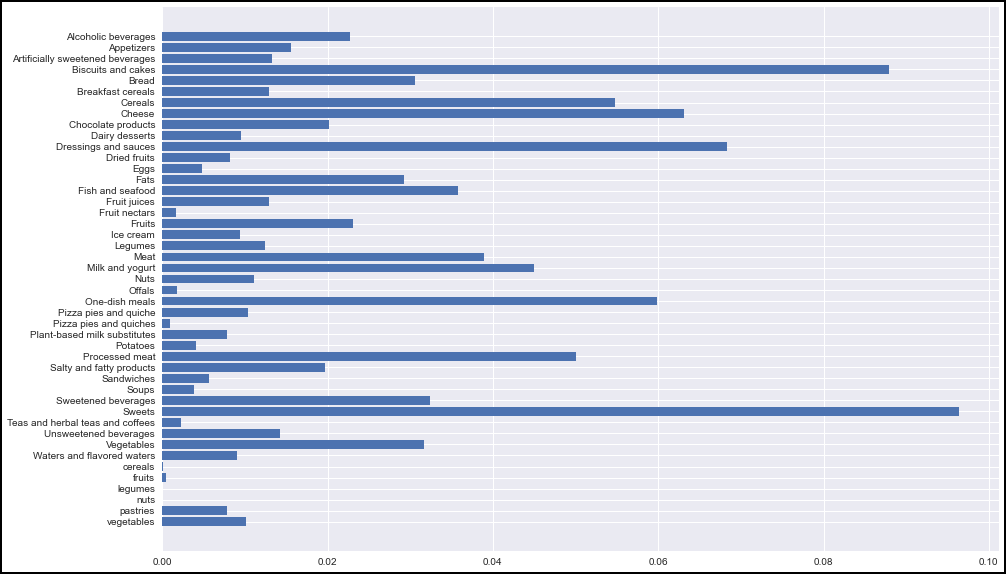

In [57]:
# barplot normalisé
plt.figure(figsize=(15, 10), edgecolor='black', linewidth=4)
plt.style.use('seaborn')
plt.barh(ser.index, ser.values)
plt.yticks(size=10)
plt.show()

##### creator

In [58]:
ser = df1['creator'].value_counts(normalize=True, ascending=True)
ser[-20:]

halal-app-chakib              0.001764
foodless                      0.001882
foodrepo                      0.001896
veganeamos                    0.002743
nutrinet-sante                0.002762
tacinte                       0.003212
swipe-studio                  0.003990
waistline-app                 0.004109
foodvisor                     0.004601
tacite                        0.004887
prepperapp                    0.005682
sebleouf                      0.005816
openfood-ch-import            0.006463
inf                           0.006917
date-limite-app               0.017597
elcoco                        0.018809
org-database-usda             0.075908
openfoodfacts-contributors    0.092026
usda-ndb-import               0.095817
kiliweb                       0.563251
Name: creator, dtype: float64

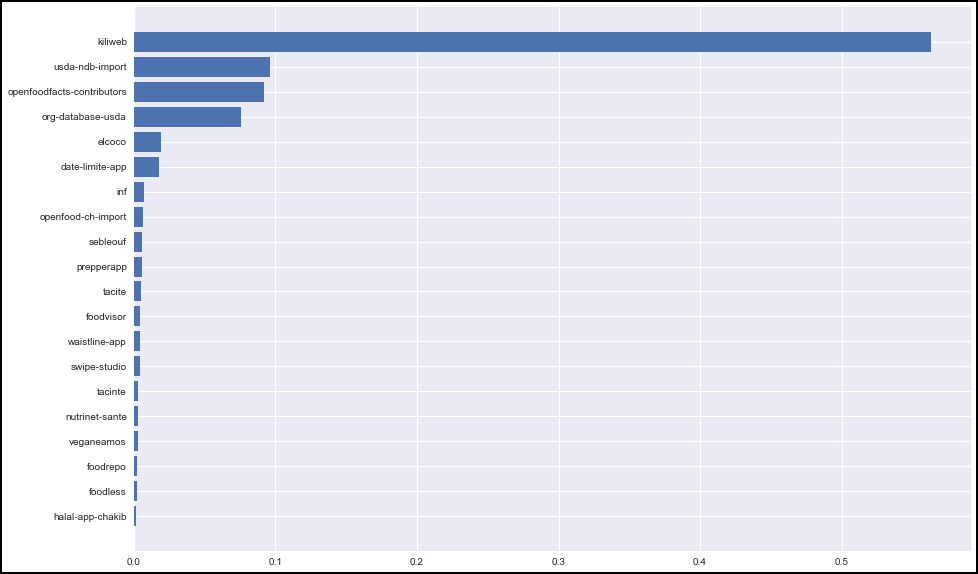

In [59]:
# barplot normalisé des 20 plus gros contributeurs à openfooodfacts
plt.figure(figsize=(15, 10), edgecolor='black', linewidth=4)
plt.style.use('seaborn')
plt.barh(ser.index[-20:], ser.values[-20:])
plt.yticks(size=10)
plt.show()

## Analyse bivariée des variables du dataframe df1

## Récupérer les données de produits vendus en France

### Analyse des colonnes qui donnent le lieu de vente d'un produit

In [60]:
df1['countries']

0             France
1             France
2              en:es
3              en:es
4             France
             ...    
1772406        en:re
1772407    en:france
1772408        en:be
1772409    en:france
1772410       France
Name: countries, Length: 1772411, dtype: object

In [61]:
df1['countries_tags']

0           en:france
1           en:france
2            en:spain
3            en:spain
4           en:france
              ...    
1772406    en:reunion
1772407     en:france
1772408    en:belgium
1772409     en:france
1772410     en:france
Name: countries_tags, Length: 1772411, dtype: object

In [62]:
df1['countries_en']

0           France
1           France
2            Spain
3            Spain
4           France
            ...   
1772406    Réunion
1772407     France
1772408    Belgium
1772409     France
1772410     France
Name: countries_en, Length: 1772411, dtype: object

In [63]:
df1['states_en'][1111111]

'To be completed,Nutrition facts completed,Ingredients completed,Expiration date completed,Packaging code to be completed,Characteristics completed,Origins completed,Categories completed,Brands completed,Packaging completed,Quantity completed,Product name completed,Photos to be validated,Packaging photo to be selected,Nutrition photo selected,Ingredients photo selected,Front photo selected,Photos uploaded'

In [64]:
ser = df1['countries'].value_counts()
ser.head(100)

France                     429618
United States              310062
en:fr                      175918
en:es                       98619
en:france                   70882
España                      69525
en:it                       58367
en:be                       29251
en:FR                       26757
en:ch                       22188
Deutschland                 20551
en:ca                       19635
en:gb                       18087
en:Germany                  17440
en:France                   16705
en:us                       16053
en:United States            15217
en:spain                    14754
en:de                       14078
Spain                       12651
en:United Kingdom           11503
Suisse                      11053
United Kingdom               8652
en:BE                        7519
Ireland, Germany             6970
Francia,España               6190
Switzerland                  5907
Germany                      5340
Belgique                     5147
Canada        

In [65]:
ser.tail(10)

hahqh                                                          1
Belgium, Switzerland, France                                   1
Guadeloupe, United States                                      1
Switzerland, United Kingdom, en:belgium                        1
Australie,Belgique,Danemark,France,Allemagne,Espagne,Suisse    1
Bulgaria,France,Hungary,Moldova,Romania,Russia                 1
Italia,en:italy,Slovenia                                       1
Uruguay, Brasil                                                1
italy, en:france                                               1
Germany,en:united-kingdom                                      1
Name: countries, dtype: int64

In [66]:
ser = df1['countries_tags'].value_counts()
ser.head(100)

en:france                              726371
en:united-states                       345359
en:spain                               199489
en:italy                                70493
en:germany                              61482
en:belgium                              48516
en:switzerland                          46380
en:united-kingdom                       40202
en:canada                               28410
en:france,en:germany                    11805
en:france,en:spain                      10422
en:australia                             9324
en:belgium,en:france                     9065
en:france,en:switzerland                 8858
en:germany,en:ireland                    7692
en:netherlands                           6389
en:mexico                                5622
en:poland                                4759
en:ireland                               4600
en:france,en:united-states               4130
en:france,en:united-kingdom              3818
en:morocco                        

In [67]:
ser.tail(10)

en:australia,en:france,en:new-caledonia,en:new-zealand                   1
en:germany,en:luxembourg,en:netherlands                                  1
en:papua-new-guinea                                                      1
en:france,en:italy,en:portugal,en:spain,es:espagne                       1
en:czech-republic,en:united-states                                       1
en:cote-d-ivoire,en:senegal                                              1
en:croatia,en:hungary,en:poland                                          1
en:belgium,en:france,en:martinique,en:reunion,en:spain,en:switzerland    1
en:costa-rica,en:el-salvador,en:guatemala,en:honduras,en:nicaragua       1
en:australia,en:turkey                                                   1
Name: countries_tags, dtype: int64

In [68]:
ser = df1['countries_en'].value_counts()
ser.head(100)

France                        726371
United States                 345359
Spain                         199489
Italy                          70493
Germany                        61482
Belgium                        48516
Switzerland                    46380
United Kingdom                 40202
Canada                         28410
France,Germany                 11805
France,Spain                   10422
Australia                       9324
Belgium,France                  9065
France,Switzerland              8858
Germany,Ireland                 7692
Netherlands                     6389
Mexico                          5622
Poland                          4759
Ireland                         4600
France,United States            4130
France,United Kingdom           3818
Morocco                         3746
Sweden                          3440
Austria                         3426
Russia                          3263
France,Italy                    3044
Thailand                        3021
P

In [69]:
ser.tail(10)

Belgium,France,Italy,Mexico,Spain                           1
Australia,New Zealand,Singapore,Thailand,United States      1
Costa Rica,France,Switzerland                               1
Algeria,United Kingdom                                      1
Bosnia and Herzegovina,France,Montenegro,Serbia             1
France,Germany,fr:deutschland,fr:frankreich                 1
Spain,es:deutschland                                        1
Belgium,France,Germany,Poland,Spain,Switzerland,Thailand    1
Qatar,Azerbaidjan                                           1
Portugal,Spain,fr:suiza                                     1
Name: countries_en, dtype: int64

Les variables 'countries_en' et 'countries_tags' renseignent les mêmes données. De plus les données sont similaires (noms des pays en anglais). La variable 'country' est plus difficilement exploitable, car les noms de pays sont indiqués en différentes langues.

=> on retient la variable 'countries_en' pour extraire les données relatives à la France

### Extraction des produits vendus en France

In [70]:
df1_France = df1.copy()
ser = df1_France['countries_en'].copy()
ser = ser.apply(lambda x : str(x).find('France')!=-1)   # ser est une série de booléens indiquant si df2 contient 'France'
df1_France = df1_France[ser]

In [71]:
with pd.option_context('display.max_rows', 400, 'display.max_colwidth', 1000):
    display(df1_France.loc[121111:122200])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
121132,0042272013432,http://world-en.openfoodfacts.org/product/0042272013432/vegetable-lasagne,kiliweb,1604230040,2020-11-01T11:27:20Z,1608631204,2020-12-22T10:00:04Z,Vegetable lasagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:eu-organic,"en:organic,en:eu-organic","Organic,EU Organic",NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:fr,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:packaging-photo-to-be-selected, en:nutrition

Les produits sont souvent déclarés 'countries_en' == 'France' alors que c'est totalement faux. En particulier, pour les produits renseignés par Yuca (creator:kiliweb)